In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/sabbi/Heart detection/heart2.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.describe().columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
#Exploratory data analysis 
# numeric and categorical value separately
data_num = data[['age','trtbps','chol','thalachh','oldpeak']]
data_cat =data[['sex','cp','fbs','restecg','exng']]


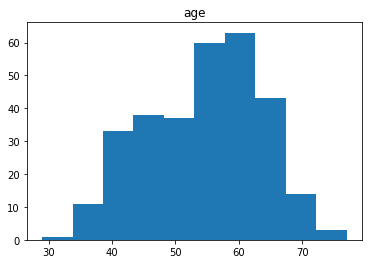

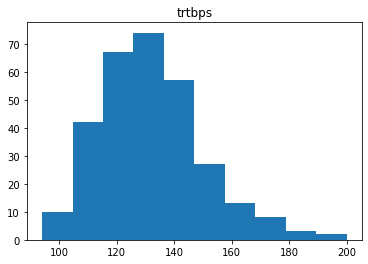

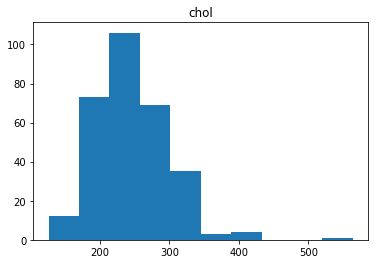

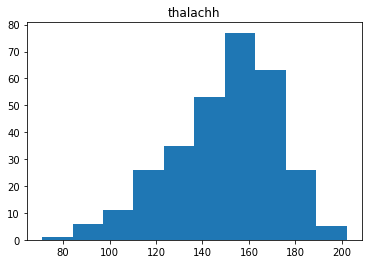

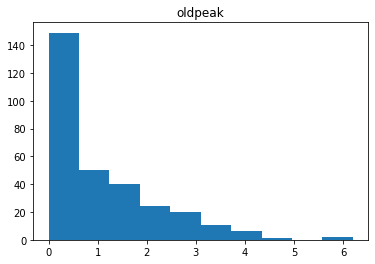

In [8]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


<AxesSubplot:>

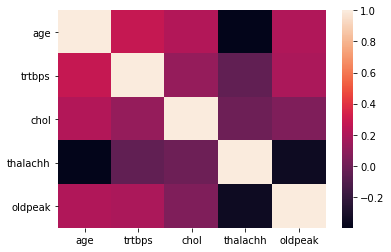

In [9]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [10]:
pd.pivot_table(data, index='output', values=['age','trtbps','chol','thalachh','oldpeak'])

,age,chol,oldpeak,thalachh,trtbps
output,,,,,
0,56.601449,251.086957,1.585507,139.101449,134.398551
1,52.496970,242.230303,0.583030,158.466667,129.303030


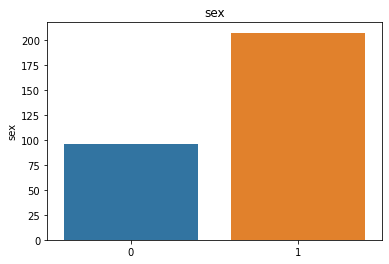

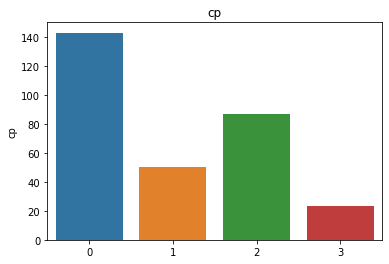

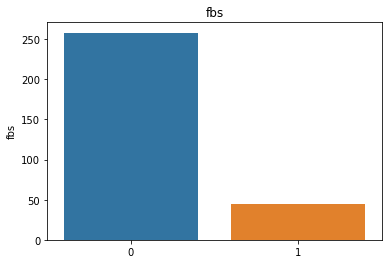

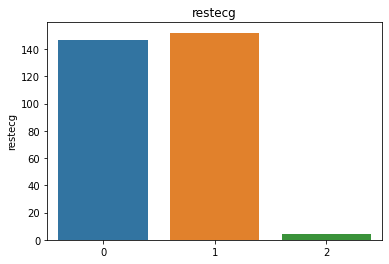

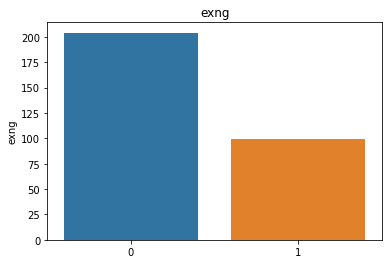

In [11]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
print(pd.pivot_table(data,index='output',columns='sex', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='cp', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='fbs', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='restecg', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='exng', values='age'))

sex             0          1
output                      
0       59.041667  56.087719
1       54.555556  50.903226
cp              0          1          2          3
output                                            
0       56.298077  57.444444  58.500000  55.142857
1       54.076923  50.024390  52.217391  56.187500
fbs             0          1
output                      
0       56.362069  57.863636
1       51.901408  56.173913
restecg          0          1     2
output                             
0        57.291139  55.660714  56.0
1        53.823529  51.312500  76.0
exng            0          1
output                      
0       57.048387  56.236842
1       52.316901  53.608696


In [13]:
print(pd.pivot_table(data,index='output',columns='sex', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='cp', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='fbs', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='restecg', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='exng', values='chol'))

sex              0           1
output                        
0       274.958333  246.061404
1       256.750000  230.989247
cp               0           1          2           3
output                                               
0       251.932692  263.444444  239.00000  253.714286
1       245.333333  240.682927  244.26087  229.875000
fbs              0           1
output                        
0       250.094828  256.318182
1       242.612676  239.869565
restecg           0           1           2
output                                     
0        255.227848  243.517857  283.333333
1        255.044118  233.625000  197.000000
exng             0           1
output                        
0       246.967742  254.447368
1       242.485915  240.652174


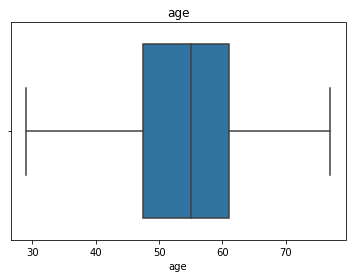

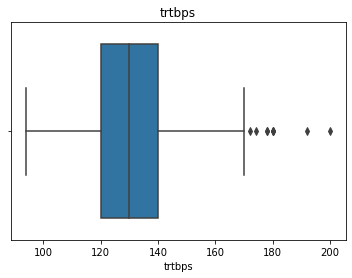

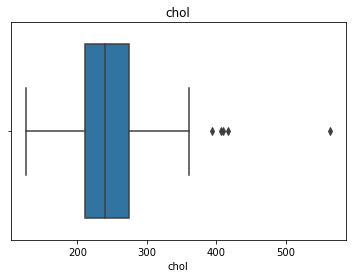

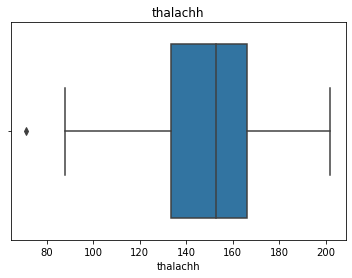

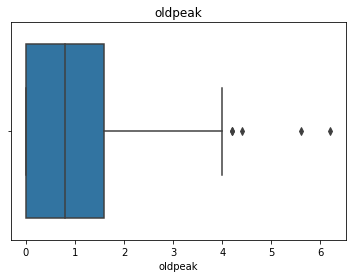

In [14]:
#Data Normalization
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [15]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [16]:
lwtrtbps,uptrtbps = outlinefree(data['trtbps'])
lwchol,upchol = outlinefree(data['chol'])
lwoldpeak,upoldpeak = outlinefree(data['oldpeak'])

In [17]:
data['trtbps'].replace(list(data[data['trtbps'] > uptrtbps].trtbps) ,uptrtbps,inplace=True)
data['chol'].replace(list(data[data['chol'] > upchol].chol) ,upchol,inplace=True)
data['oldpeak'].replace(list(data[data['oldpeak'] > upoldpeak].oldpeak) ,upoldpeak,inplace=True)

In [18]:
#feature engineering
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [19]:
#Logistic Regression 
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=102)

classimodel= LogisticRegression()  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_pred =  classimodel.predict(X_test)

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

test score: 0.9210526315789473 train score: 0.8281938325991189 



array([[32,  2],
       [ 4, 38]], dtype=int64)

In [20]:
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 f1 score:  0.9268292682926829 

 precision score:  0.95 

 recall score:  0.9047619047619048 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.95      0.90      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



0.9214756258234519


0.9214756258234519

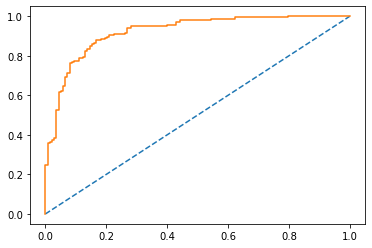

In [26]:
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)
0.9214756258234519

In [21]:
classimodel.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([1], dtype=int64)

In [22]:
classimodel.predict([[62,0,2,140,230,0,1,145,0,2.8,1,1,0]])

array([1], dtype=int64)

In [23]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=8) 

svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predsvc =  svcmodel.predict(X_test)

print(confusion_matrix(y_test, y_predsvc))
#SVM model

test score: 0.75 train score: 0.6916299559471366 

[[19 10]
 [ 9 38]]


In [24]:
print("f1_score: ",f1_score(y_test, y_predsvc),'\n')
print("precision_score: ",precision_score(y_test, y_predsvc),'\n')
print("recall_score: ",recall_score(y_test, y_predsvc),'\n')
print(classification_report(y_test, y_predsvc),'\n')

f1_score:  0.7999999999999999 

precision_score:  0.7916666666666666 

recall_score:  0.8085106382978723 

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        29
           1       0.79      0.81      0.80        47

    accuracy                           0.75        76
   macro avg       0.74      0.73      0.73        76
weighted avg       0.75      0.75      0.75        76
 



0.7571805006587613


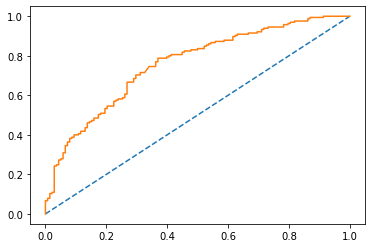

In [25]:
probabilityValues = svcmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

In [27]:
import pickle

In [28]:
with open('model_pickle','wb') as f:
    pickle.dump(svcmodel,f)

In [29]:
with open('model_pickle','rb') as f:
    model=pickle.load(f)